جلسه ۱۴ مهر ماه ۱۴۰۰

پایه هشتم


In [ ]:
num = int(input())
for i in range(num):
    print(i)

In [ ]:
# List - Dict - Tuple

In [ ]:
# Series - Dataframe

In [127]:
# یادآوری
ls = []
for i in range(7):
    tmp = i**2
    ls.append(tmp)
print(ls)

[0, 1, 4, 9, 16, 25, 36]


In [128]:
# یادآوری
print(ls[6])
print(ls)
ls[6] = 9
print(ls[6])
print(ls)

36
[0, 1, 4, 9, 16, 25, 36]
9
[0, 1, 4, 9, 16, 25, 9]


In [129]:
a = 'sajad'
b = 'armin'
armin = [1,2,5]
sajad = [4,3.14,1.62]
u = [a, b]
print(armin, sajad, u)

[1, 2, 5] [4, 3.14, 1.62] ['sajad', 'armin']


In [133]:
# این چیزایی که اینجا نوشته میشه رو سخت نگیرید
# بعدا توضیح میدمشون
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sajadfaghfoor/dataset/main/daily_adj_candles/%D8%A2%D8%B3%D8%A7%D8%B3-%D8%AA.csv')
pricels = list(df.close)
len(pricels)


1557

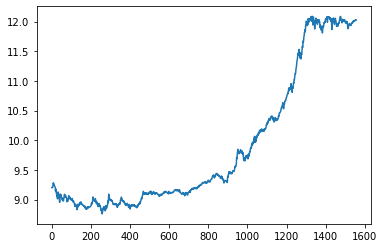

In [134]:
# این چیزایی که اینجا نوشته میشه رو سخت نگیرید
# بعدا توضیح میدمشون
import matplotlib.pyplot as plt
import math
plt.plot(list(map(math.log, price)))

In [136]:
def panic_mode(todayp, lastweekp):
    if todayp / lastweekp < 0.9:
        return True
    return False

def profit_mode(todayp, lastweekp):
    if todayp / lastweekp > 1.1:
        return True
    return False

length = len(pricels)
wealth = 100 # 100 MT
inMarket = False
tsahm = 0

wealthls = []

for i in range(7, length):
    todayp = pricels[i]
    lastweekp = pricels[i-7]
    panicing = panic_mode(todayp, lastweekp)
    profit = profit_mode(todayp, lastweekp)

    wealthls.append(wealth + tsahm * todayp)
    
    if panicing:
        if inMarket:
            wealth = (todayp * tsahm)*0.9925
            inMarket = False
        # print('panic', i)
    elif profit:
        if not inMarket:
            tsahm = wealth * 0.9925 / todayp
            wealth = 0
            inMarket = True
        # print('profit', i)

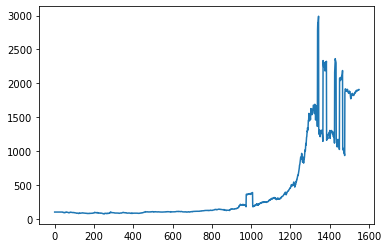

In [137]:
plt.plot(wealthls)

پایه نهم

In [139]:
ls = []
# ls.append()
# ls.insert()
ls = [1,2,3]
ls[1] = 1231
ls = ['Ilya', 'Radman', 'Hafez']
for name in ls:
    print(name, 'is good!')

ls = ['Sajad']
for i in range(len(ls)):
    name = ls[i]
    print(name, 'is the teacher!')

Ilya is good!
Radman is good!
Hafez is good!
Sajad is the teacher!


In [ ]:
dic_price = {'close': {"2":100, "1":101, "0":105}, 'vol': [1000, 900, 1020]}
d = {'sajad': 21, 'ali': 14}
# dic_price['close']['2']

In [144]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sajadfaghfoor/dataset/main/daily_adj_candles/%D9%88%D9%86%D9%88%DB%8C%D9%86-%D8%AA.csv')

In [145]:
# df2 = df.set_index('date')
df['close']
df.loc[1, 'vol']

3200

In [146]:
df['close7Shifted'] = df['close'].shift(-7)
pdf = df[df['close7Shifted'] > 1.1*df['close']]
pdf.head(2)

,date,open,high,low,last,close,vol,count,value,close7Shifted
0,20040204,194.02,220.0,194.0,196.74,196.74,3500000,1777,1.313375e+10,263.70
1,20040207,206.55,207.0,197.0,196.90,196.90,3200,5,1.260462e+07,276.87


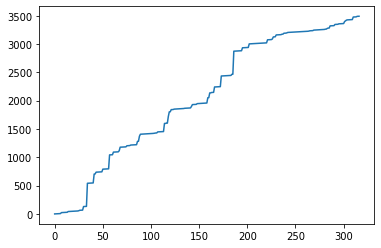

In [147]:
# چرا تحلیل تکنیکال کار می‌کند؟
plt.plot(pdf.index)

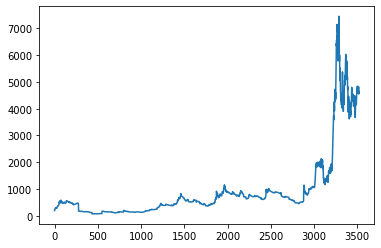

In [148]:
df.close.plot()

In [149]:
df = df[['close']]
df['close7Shifted'] = df['close'].shift(7)
df.tail(10)

,close,close7Shifted
3510,4756.0,4618.0
3511,4707.0,4575.0
3512,4689.0,4646.0
3513,4693.0,4799.0
3514,4737.0,4704.0
3515,4815.0,4622.0
3516,4811.0,4641.0
3517,4661.0,4756.0
3518,4549.0,4707.0
3519,4648.0,4689.0


In [150]:
index_sell = df[df['close'] / df['close7Shifted'] < 0.9].index
index_buy = df[df['close'] / df['close7Shifted'] > 1.1].index

In [153]:
saham = 0
money = 100 

max_idx = 3519
idx = 0
wealthls = [] 
while idx <= max_idx:
    if idx in index_sell:
        money += saham*df.loc[idx, 'close']
        saham = 0
    if idx in index_buy:
        saham += money / df.loc[idx, 'close']
        money = 0

    wealth = df.loc[idx, 'close']*saham + money
    wealthls.append(wealth)
    idx += 1

money += df.loc[max_idx, 'close']*saham
saham = 0

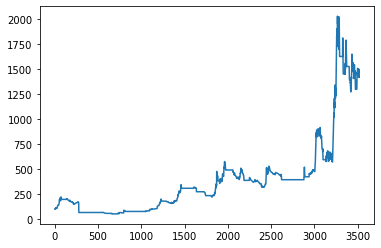

In [154]:
plt.plot(wealthls)